# Practical Statistics for Data Scientists : Data and Sampling Distribution

source : https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

This notebook is a summary of the key points to be extracted from the Book **Practical Statistics for Data Scientists** by Peter Bruce, Andrew Bruce and Peter Gedeck

I will gather the most important concepts as well as python codes that can constitute strong basis for future structured analysis. I will also put some standard concepts as a quick reminder and others that might seem simple but that I am not familiar with.

In [1]:
#Imports
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import trim_mean
import wquantiles

from statsmodels import robust

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# makes path easy
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
# file load
LOANS_INCOME_CSV = DATA / 'loans_income.csv'

## Data and Sampling Distribution

* **Binomial** :  A binomial experiment is an experiment where you have a fixed number of independent trials with only have two outcomes. For example, the outcome might involve a yes or no answer. 

* **Sample** : subset of data from a larger data set (population).  
* **population** : large defined set fo data.
* **Random sampling** : process in which each available member of the population has an equal chance of being chosen. The sample result is called **simple random sample**  :  

    * **Sampling with replacement** : observations are put back in the population
    * **Sampling without replacement** : observations no loger available for future draws
    
* **Stratified sampling** : dividing the population into strata and randomly sampling from each strata  
* **Sample Bias** : sample that misrepresents the population


Data Quality matters more thant data Quantity. Quality involves :
* Consistency of format
* cleanliness
* accuracy of individual data points


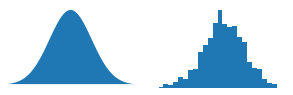

In [4]:
# populaiton and sampling plotting
np.random.seed(seed=1)
x = np.linspace(-3,3,300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5,1.5))

ax = axes[0]
# probability density function
ax.fill(x,stats.norm.pdf(x))
# masquer les axes
ax.set_axis_off()
ax.set_xlim(-3,3)

ax = axes[1]

ax.hist(xsample,bins=30)
# masquer les axes
ax.set_axis_off()
ax.set_xlim(-3,3)
ax.set_position


plt.show()

### Sample mean Vs Population Mean

* $\bar{x}$ : Sample mean represents the mean of a sample
* $\mu$ : represents the mean of a population 

### Regression to the mean

## 2. Sampling distribution of a statistic 

* **Sample statistic** : metric calculated for a sample of data drawn from a larger population  
* **Data distribution** : frequency distribution of individual values in a data set
* **Central Limit theorem** : tendency of the sampling distribution to take on a normal shape as sample size rises
* **Standard Error** : The variability of a sample statistic over many samples

! The larger the sample, the narrower the disribution of the sample statistic

In [8]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [22]:
# Sample of 1000 values
sample_data = pd.DataFrame({'income':loans_income.sample(1000),'type':'Data'})
print('\n Sample of data \n\n',sample_data.head())

# Sample of 1000 means of 5 values
sample_mean_05 = pd.DataFrame({'income':[loans_income.sample(5).mean() for _ in range (1000)],'type':'Mean of 5',})
print('\n Sample of 5 \n\n',sample_mean_05.head())

# Sample of 1000 means of 20 valeus
sample_mean_20 = pd.DataFrame({'income':[loans_income.sample(20).mean() for _ in range (1000)],'type':'Mean of 20',})
print('\n Sample of 20 \n\n',sample_mean_20.head())

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print('\n Results \n\n',results.head())


 Sample of data 

        income  type
15819   75000  Data
26772   76000  Data
29771   85000  Data
47786   77000  Data
11292   52000  Data

 Sample of 5 

     income       type
0  69900.0  Mean of 5
1  80556.0  Mean of 5
2  63656.0  Mean of 5
3  50480.0  Mean of 5
4  70800.0  Mean of 5

 Sample of 20 

      income        type
0  58894.70  Mean of 20
1  72110.80  Mean of 20
2  71341.40  Mean of 20
3  72830.65  Mean of 20
4  65503.00  Mean of 20

 Results 

         income  type
15819  75000.0  Data
26772  76000.0  Data
29771  85000.0  Data
47786  77000.0  Data
11292  52000.0  Data
